## Transforming coordinates

In [1]:
import geowombat as gwb

---

In [2]:
fn = '../data/test.tif'

In [3]:
with gwb.open(fn) as src:
    garray = src.read(bands=-1)

---

The array has 4 layers, 1,008 rows, and 1,287 columns.

In [4]:
garray.layers, garray.rows, garray.columns

(4, 1008, 1287)

The cell size is 2m x 2m

In [5]:
garray.cell_y, garray.cell_x

(2.0, -2.0)

In [6]:
garray.crs

'PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'

### Coordinate transformation is similar to `GeoPandas`

Re-project to lat/lon

In [7]:
garray_wgs84 = garray.to_crs(crs=4326)

Cell sizes are now in decimal degrees

In [8]:
garray_wgs84.cell_y, garray_wgs84.cell_x

(1.8595289353452247e-05, -1.859565247442531e-05)

In [9]:
garray_wgs84.crs

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

### Resampling

The default resampling method uses nearest neighbor

In [10]:
garray_resamp = garray.to_crs(cell_size=10.0)

In [11]:
garray_resamp.shape

(4, 202, 257)

In [12]:
garray_resamp.crs

'PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'

In [13]:
garray_resamp.cell_y, garray_resamp.cell_x

(10.0, -10.0)

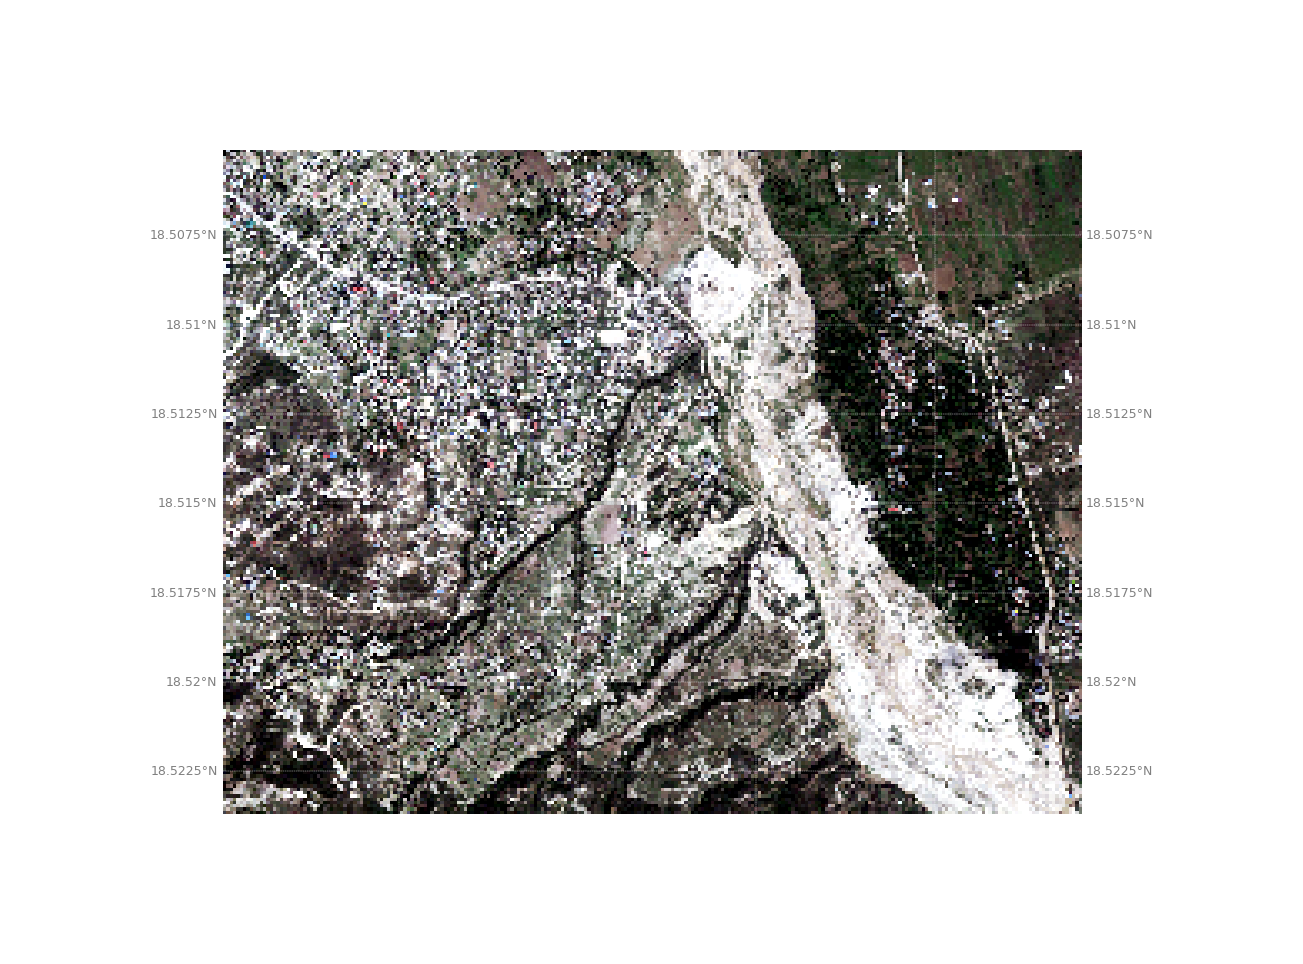

In [14]:
garray_resamp.show(bands=[3, 2, 1])

### Resample and show in place

Resample with cubic convolution

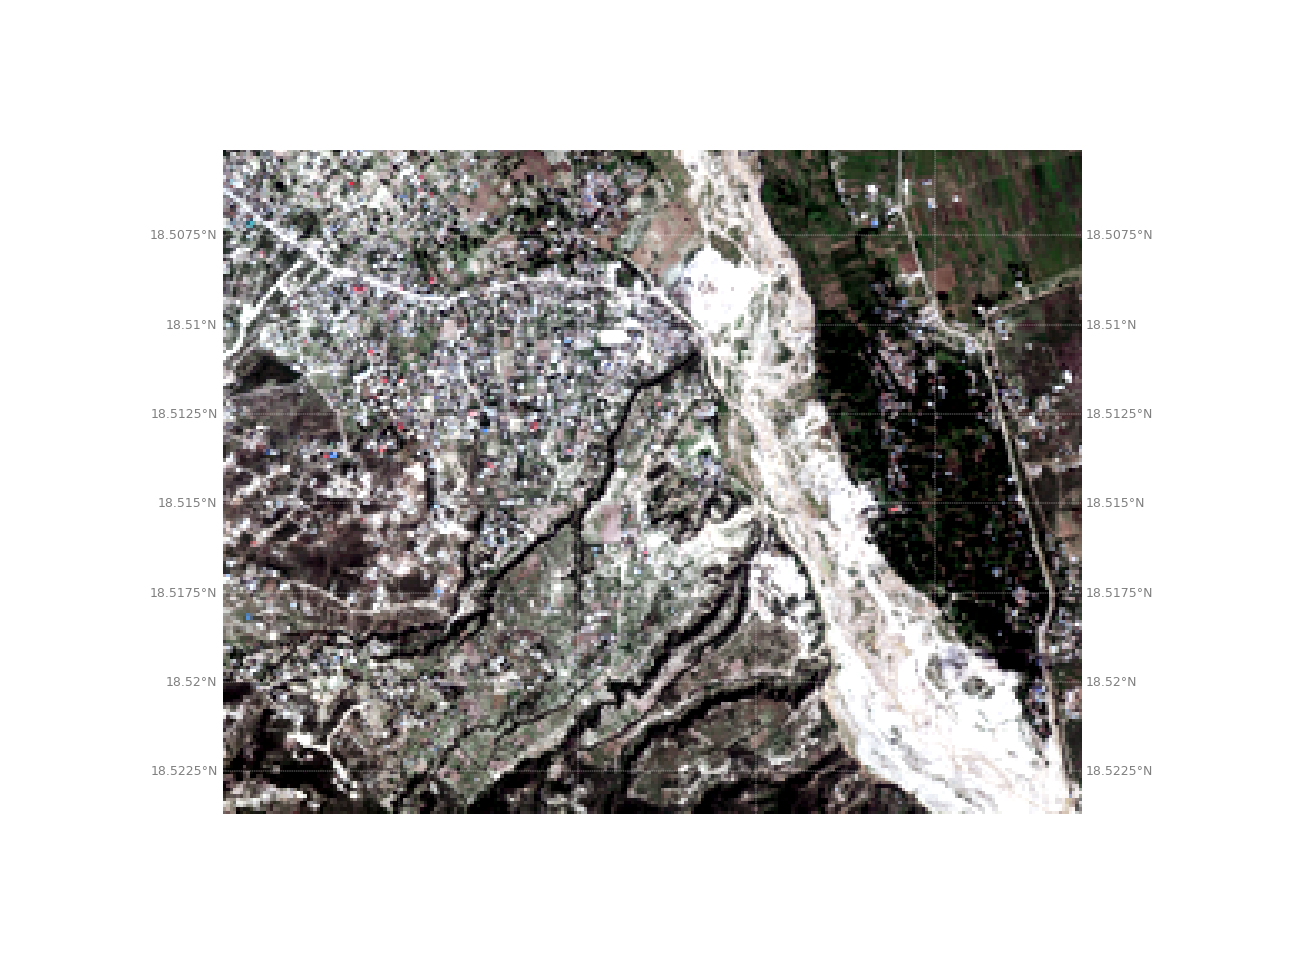

In [15]:
garray.to_crs(cell_size=10.0, resample='cubic').show(bands=[3, 2, 1])